In [145]:
import numpy as np
import matplotlib.pyplot as plt

In [146]:
# Written by Dr. Jahrul Alam (alamj@mun.ca)
# for teaching POD and DMD modes

# See the book, "Data-Driven Fluid Mechanics Combining First Principles and Machine Learning"

# a simple 4 x 3 matrix
A = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

# singular value decomposition
[Phi, Sig, PsiT] = np.linalg.svd(A,full_matrices=False)

# low rank approximation
r = 1
rPhi = Phi[:,:r]
rSig = Sig[:r]
rPsiT = PsiT[:r,:]
B = np.linalg.multi_dot([rPhi*rSig,rPsiT])
#A, B


Homework: 
         add some random noise into the data matrix U
         perform a low rank approximation by SVD
         watch if there is an effect of the noise on how accurately 
         the matrix is reconstructed by the low-rank approximation


In [147]:

# parameters for the synthetic data u(x,t)

x1 = 0.5
x2 = -0.5
c1 = 1
c2 = 1.2
f1 = 2
f2 = 4
s1 = 0.6
s2 = 0.3

# domain of u(x,t) is [xmin, xmax] x [0, T]
# we construct a space-time grid
# and sample u(x,t) on the grid

T = 50
xmin = -2
xmax = 2
nx = 128
nt = 4096

pi = np.pi
x = np.linspace(xmin, xmax, nx)
t = np.linspace(0, T, nt)

# grid
x, t = np.meshgrid(x,t,indexing='ij')

# synthetic data U

U = c1*np.exp( -(x-x1)**2/(2*s1**2) ) *np.sin(2*pi*f1*t) + c2*np.exp( -(x-x2)**2/(2*s2**2) )*np.sin(2*pi*f2*t)
np.random.seed(12345)
#U = U + noise
# SVD
Phi, Sig, PsiT = np.linalg.svd(U,full_matrices=0)




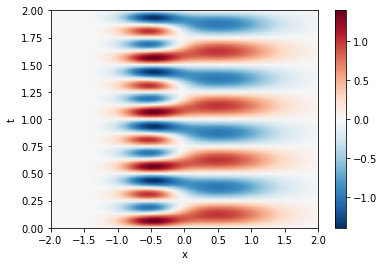

In [148]:
# visualize the data U for a portion of time domain

plt.pcolormesh(x,t,U,cmap='RdBu_r',shading='gouraud')
plt.ylim([0,2])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

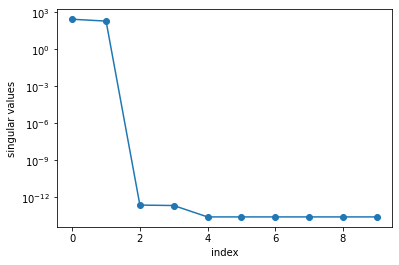

In [149]:
# show the singular values
plt.semilogy(np.arange(0,10),Sig[:10],'o-')
plt.xlabel('index')
plt.ylabel('singular values')
plt.show()

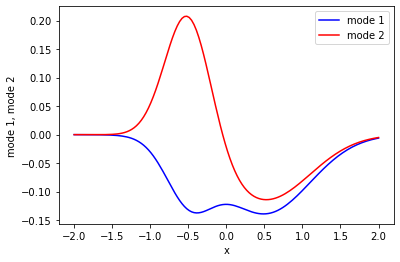

In [150]:
# first two POD

plt.plot(x[:,0],Phi[:,0],'b-',label='mode 1')
plt.plot(x[:,0],Phi[:,1],'r-',label='mode 2')
plt.xlabel('x')
plt.ylabel('mode 1, mode 2')
plt.legend()
plt.show()

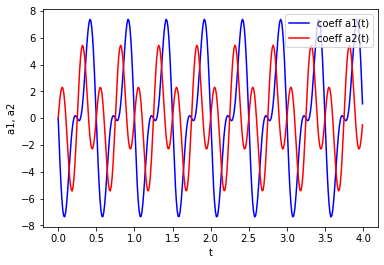

In [151]:
# first two temporal modes, a1(t), a2(t)

m = 328
plt.plot(t[0,:m], Sig[0]*PsiT[0,:m],'b-', label='coeff a1(t)')
plt.plot(t[0,:m], Sig[1]*PsiT[1,:m],'r-', label='coeff a2(t)')
plt.xlabel('t')
plt.ylabel('a1, a2')
plt.legend()

plt.show()

In [152]:
#np.linalg.matrix_rank(U), U.shape
r =1
rPhi = Phi[:,:r]
rSig = Sig[:r]
rPsiT = PsiT[:r,:]
rU = np.dot(rPhi*rSig, rPsiT)
np.linalg.matrix_rank(U)

2

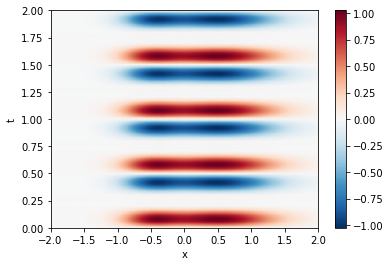

In [153]:
plt.pcolormesh(x,t,rU,cmap='RdBu_r',shading='gouraud')
plt.ylim([0,2])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

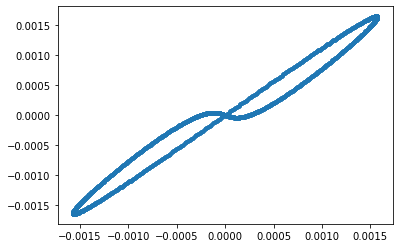

In [154]:
plt.plot(U[10,:],rU[10,:],'.')
